In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [ ]:
#################################################

In [ ]:
############### QUESTION 1 ######################

In [ ]:
# My surname is LI, and the company chosen is Lockheed Martin Corp.

In [87]:
# Download Monthly Stock Price Data for Lockheed Martin Corp.
data = yf.download("LMT", start="2015-01-01", end="2019-12-31", interval='1mo')

[*********************100%%**********************]  1 of 1 completed


In [90]:
# Calculate Monthly Log Returns and Annualised Return
# Calculate log returns
data['Log_Return'] = np.log(data['Adj Close'] / data['Adj Close'].shift(1))

# Drop missing values introduced by the shift
data = data.dropna()




# Calculate annualized return
average_monthly_return = data['Log_Return'].mean()
annualized_return = (1 + average_monthly_return)**12 - 1

# Step 3: Calculate Annualised Volatility
# Calculate annualized volatility
annualized_volatility = data['Log_Return'].std() * np.sqrt(12)

# Display the results
print("\nAnnualised Return:")
print(f"{annualized_return * 100:.2f}%")

print("\nAnnualised Volatility:")
print(f"{annualized_volatility * 100:.2f}%")


Annualised Return:
17.68%

Annualised Volatility:
18.66%


In [8]:
# Download ESG Data and Handle Missing Values
pip install yesg

Note: you may need to restart the kernel to use updated packages.


In [10]:
import yesg

In [ ]:
# GET THE full ESG DATA FOR THE COMAPNY

In [98]:
esg_data = yesg.get_historic_esg('LMT')

In [99]:
# TO KNOW THE COLUMNS NAMES
print(esg_data.columns)

Index(['Total-Score', 'E-Score', 'S-Score', 'G-Score'], dtype='object')


In [100]:
esg_score_column_name = 'Total-Score'

In [101]:
# Assuming esg_data is a DataFrame with 'totalScore' column
esg_data = esg_data['Total-Score']

In [103]:
# Filter data for the specified date range
esg_data = esg_data.loc['2015-01-01':'2019-12-31']

In [104]:
# PRINT DATA
esg_data

Date
2015-01-01    72.00
2015-02-01    71.00
2015-03-01    69.00
2015-04-01    69.00
2015-05-01    70.00
2015-06-01    70.00
2015-07-01    70.00
2015-08-01    70.00
2015-09-01    70.00
2015-10-01    70.00
2015-11-01    70.00
2015-12-01    71.00
2016-01-01    71.33
2016-02-01    71.33
2016-03-01    71.33
2016-04-01    69.97
2016-05-01    69.97
2016-06-01    69.97
2016-07-01    69.27
2016-08-01    69.27
2016-09-01    69.27
2016-10-01    69.27
2016-11-01    69.27
2016-12-01    69.27
2017-01-01    69.29
2017-02-01    69.29
2017-03-01    68.42
2017-04-01    70.00
2017-05-01    69.56
2017-06-01    69.56
2017-07-01    69.56
2017-08-01    69.56
2017-09-01    69.56
2017-10-01    67.71
2017-11-01    67.71
2017-12-01    67.71
2018-01-01    67.71
2018-02-01    67.71
2018-03-01    67.71
2018-04-01    67.71
2018-05-01    67.71
2018-06-01    67.71
2018-07-01    67.71
2018-08-01    67.71
2018-09-01    62.87
2018-10-01    63.47
2018-11-01    63.37
2018-12-01    63.37
2019-01-01    63.37
2019-02-01    6

In [106]:
# Fill missing values with the previous month's data
esg_data = esg_data.ffill()

In [108]:
# Combine stock price and ESG data
combined_data = pd.concat([data['Adj Close'], esg_data], axis=1)
combined_data.columns = ['Stock Price', 'ESG Score']

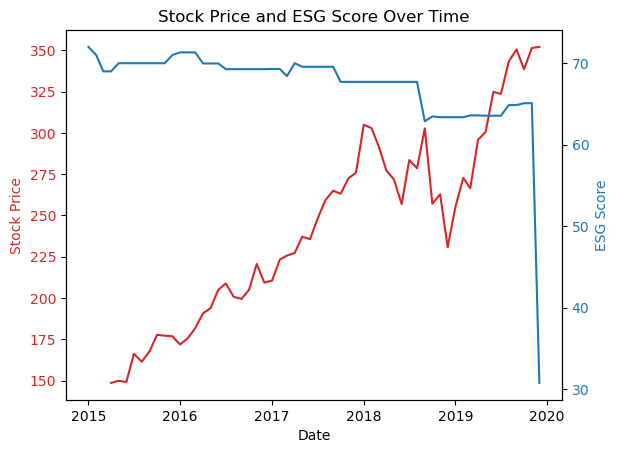

In [115]:

# Plotting
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price', color=color)
ax1.plot(combined_data.index, combined_data['Stock Price'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('ESG Score', color=color)
ax2.plot(combined_data.index, combined_data['ESG Score'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Stock Price and ESG Score Over Time')
plt.show()


In [114]:
# Calculate and Analyse the Correlation
correlation_coefficient = combined_data['Stock Price'].corr(combined_data['ESG Score'])
print(f"\nCorrelation Coefficient: {correlation_coefficient:.4f}")



Correlation Coefficient: -0.5585


In [ ]:
#################################################

In [ ]:
############### QUESTION 2 ######################

In [ ]:
# information given
city = "shanghai"
month = 9
year = 2002

# which means i need to calculate the CDD

latitude = 31.2304  
longitude = 121.4737 
altitude = 4  
base_temperature = 18  

In [41]:
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

In [59]:
# Step 1: Data Collection and Visualization
# Using the meteostat library, we gather daily average temperature data for shanghai

# Setting the time period from 2022-09-01 to 2022-09-30
start = datetime(2022, 9, 1)
end = datetime(2022, 9, 30)

# set the location
location = Point(31.2304, 121.4737, 4)

In [60]:
# fetch the daily data
# Using the specified location and time range, we fetch the daily weather data:
data = Daily(location, start, end)
data = data.fetch()

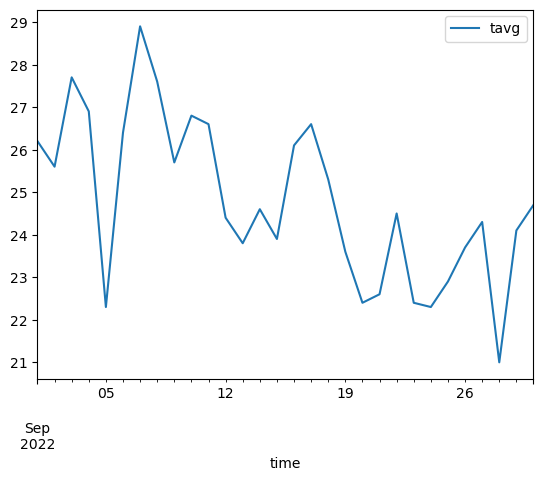

In [61]:
data.plot(y=['tavg'])
plt.show()

In [62]:
# Calculating Cooling Degree Days (CDD)

#  Cooling Degree Days (CDD) are a measure used to quantify the demand for energy needed to cool a building. 
#  The CDD is calculated as the difference between a day's average temperature and a base temperature, 
#  only considering days that are warmer than the base temperature. The formula is:
#       CDD=max(𝑇avg−18,0)
#  where Tavg is the average temperature

In [63]:
T_base = 18
cdds = [max(temp - T_base, 0) for temp in data.tavg]

In [64]:
total_cdd = sum(cdds)
print("Total CDD:", total_cdd)

Total CDD: 203.9


In [ ]:
# in concolusion the CDD is 203.9